In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the training and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Number of null values in train_df is: 733271


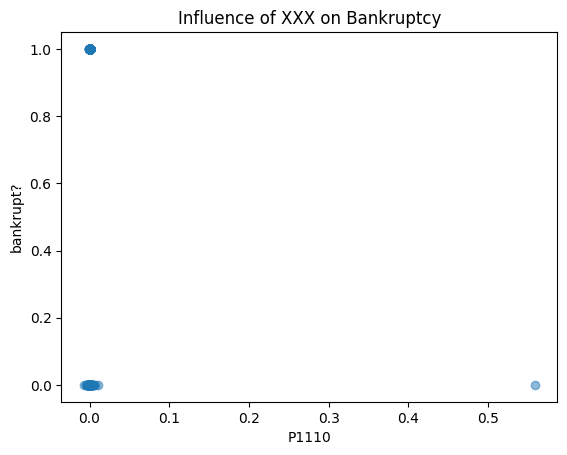

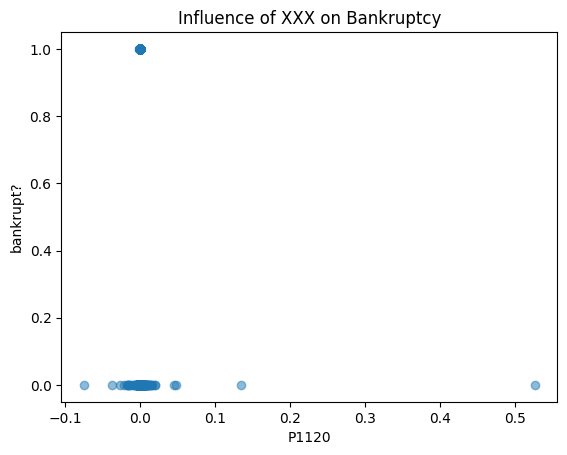

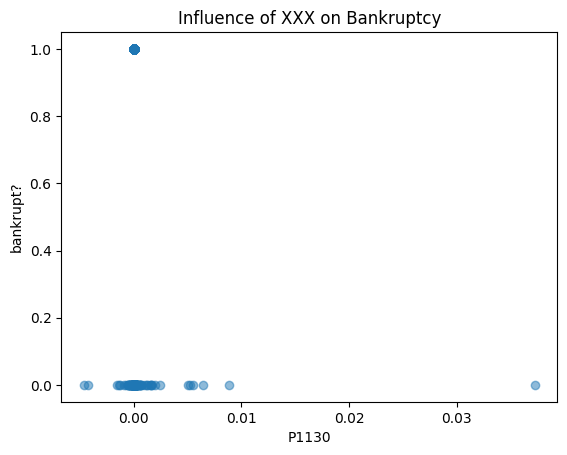

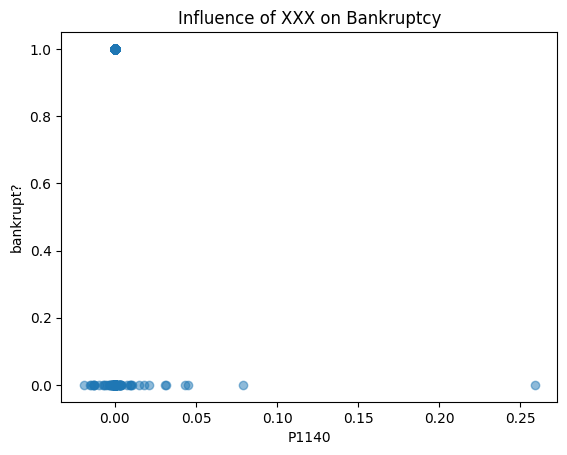

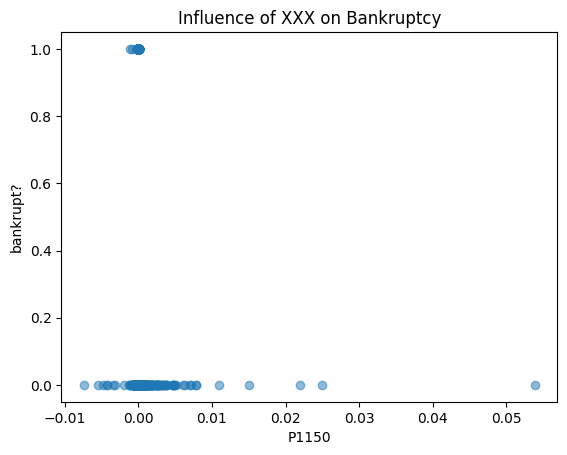

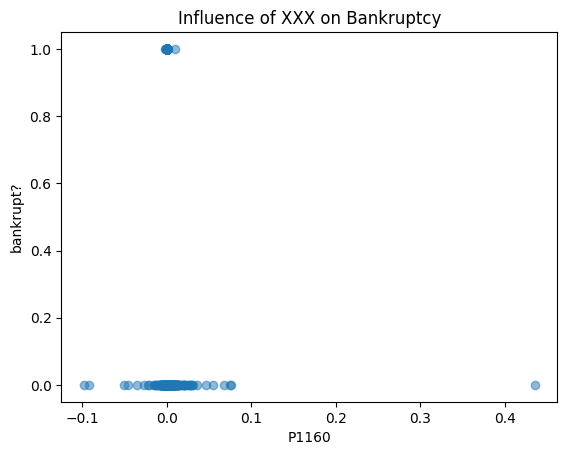

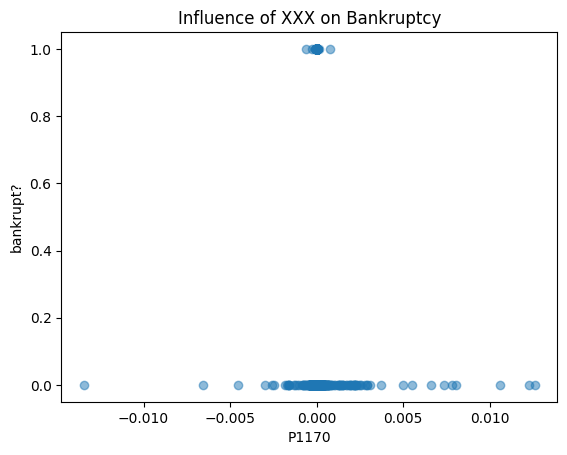

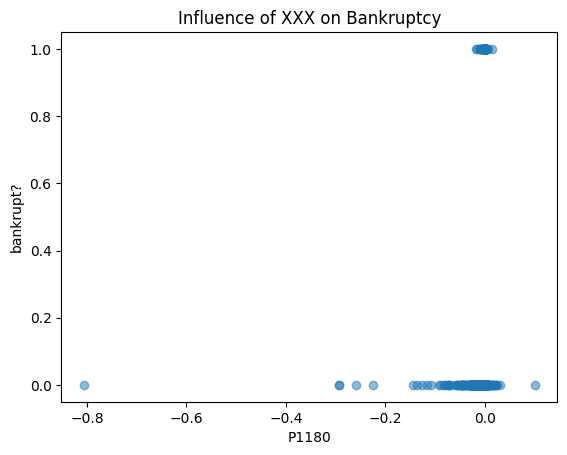

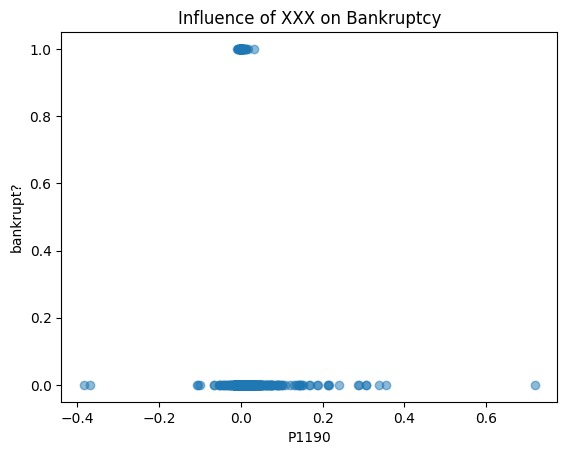

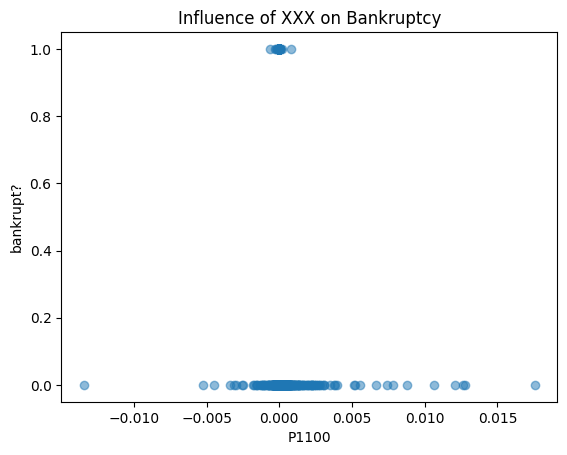

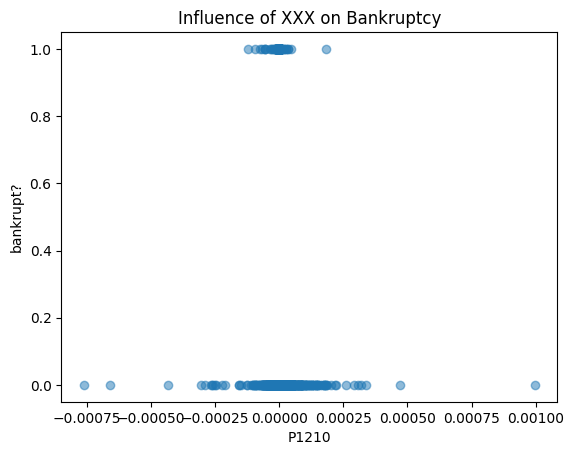

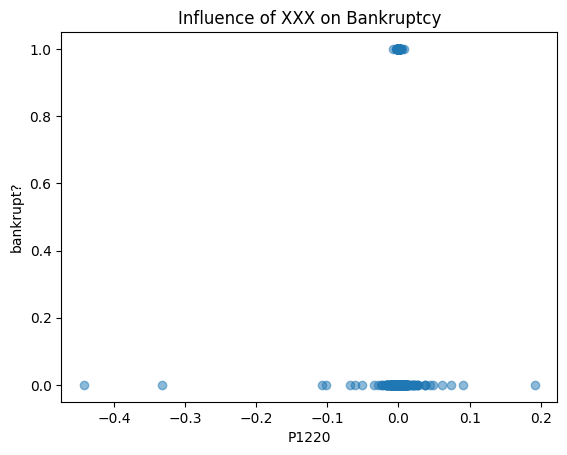

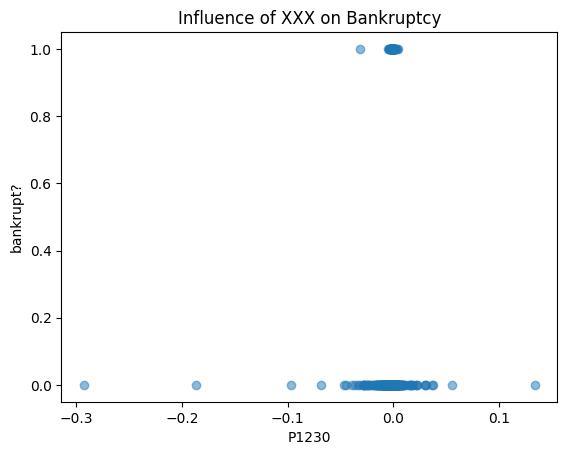

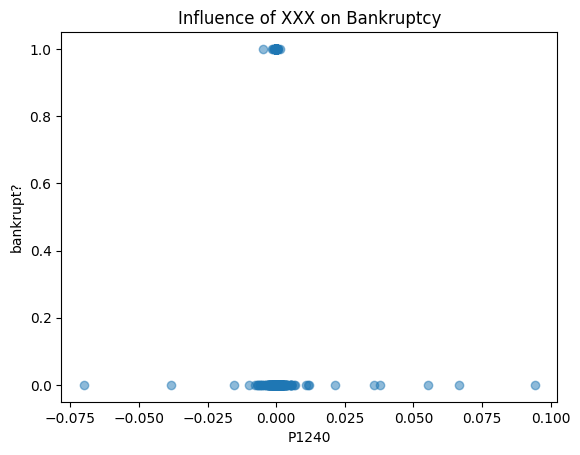

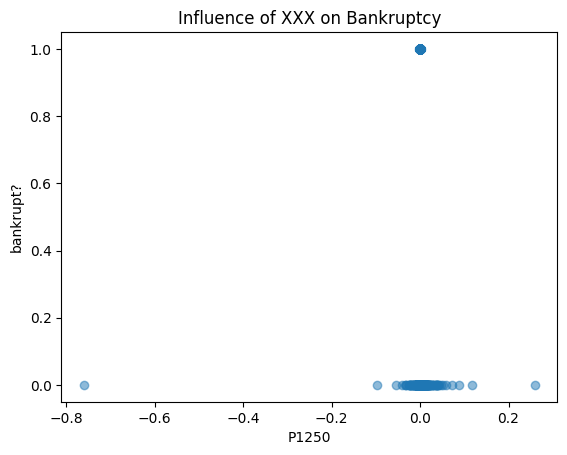

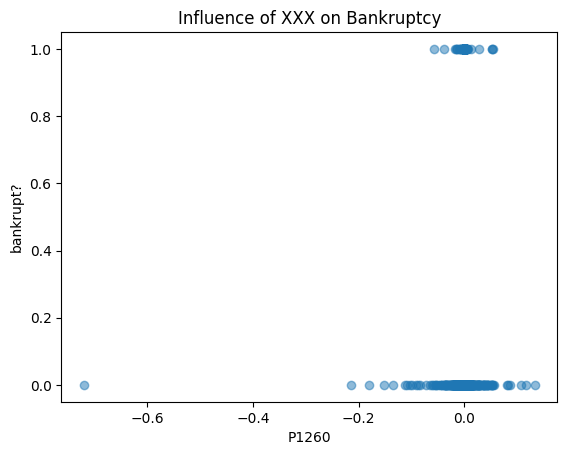

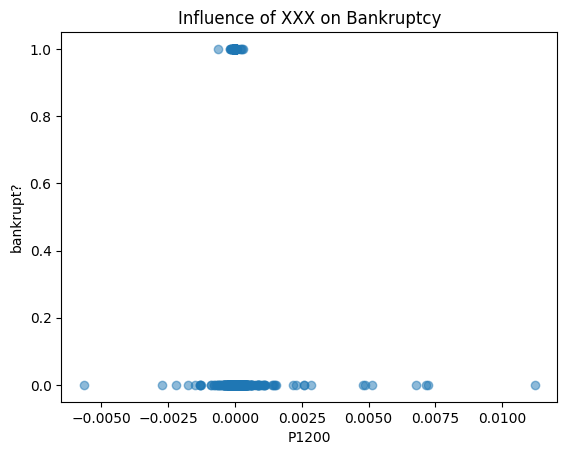

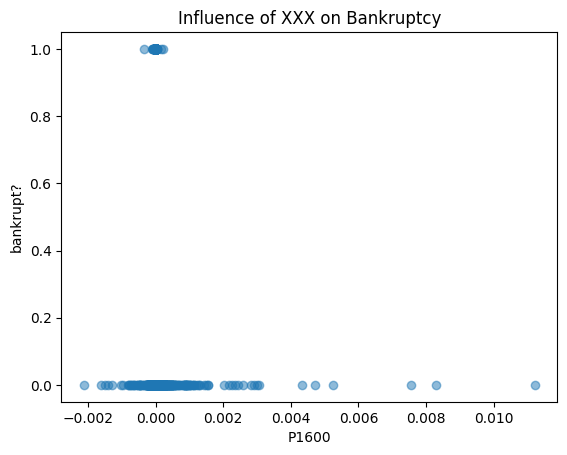

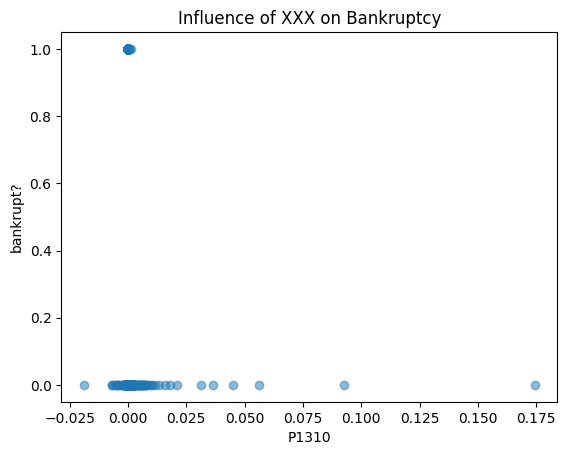

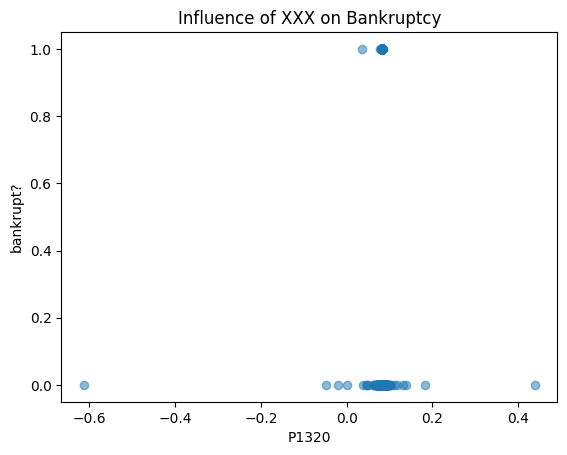

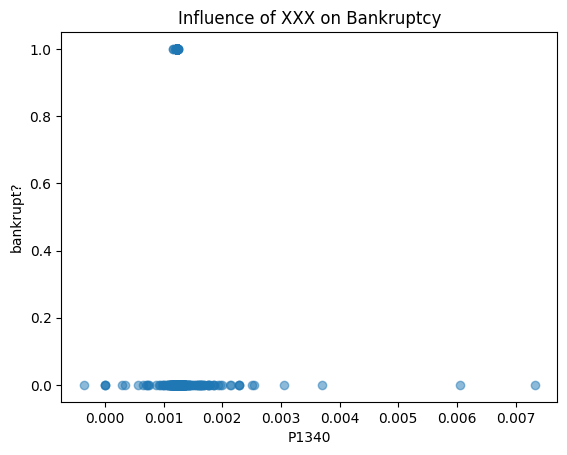

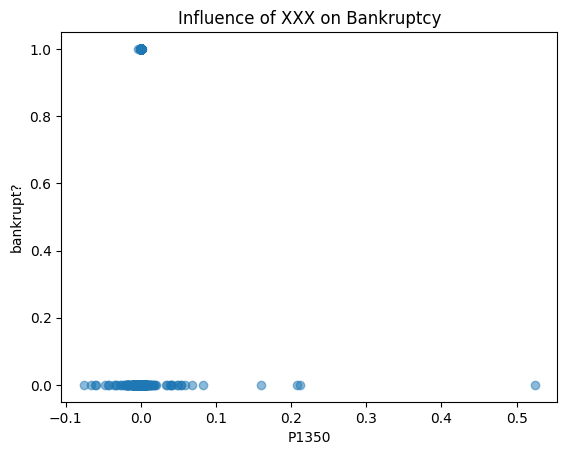

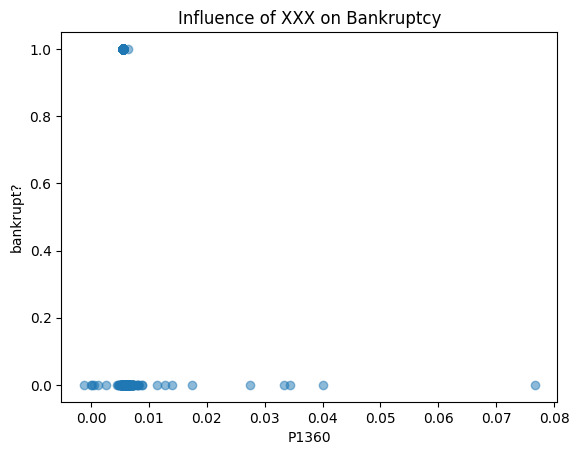

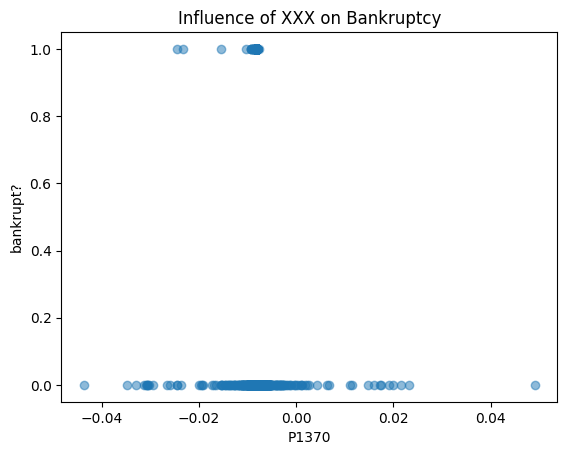

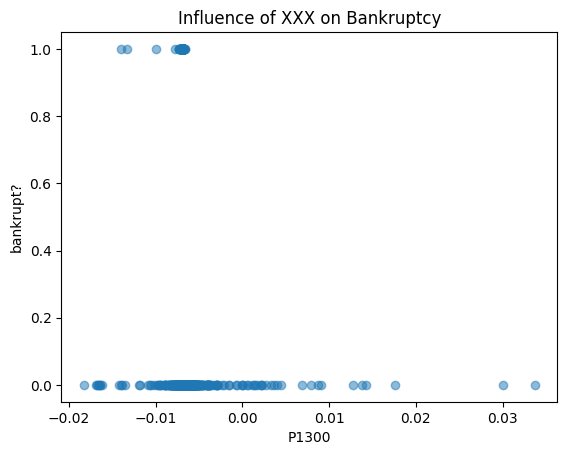

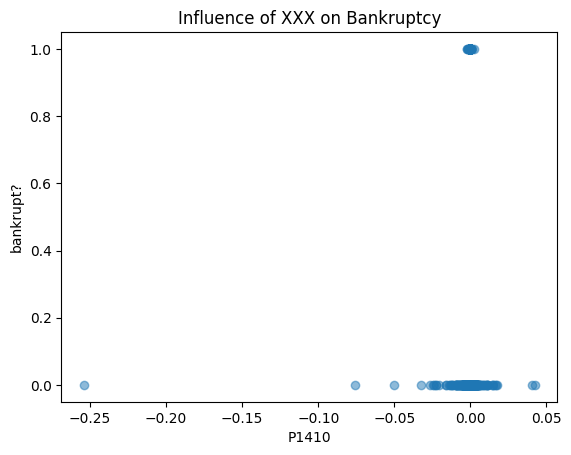

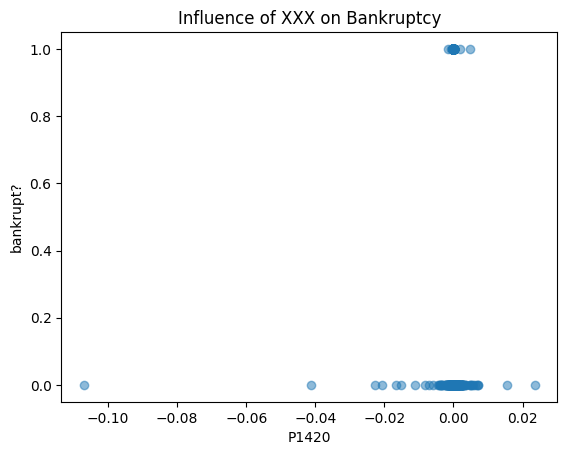

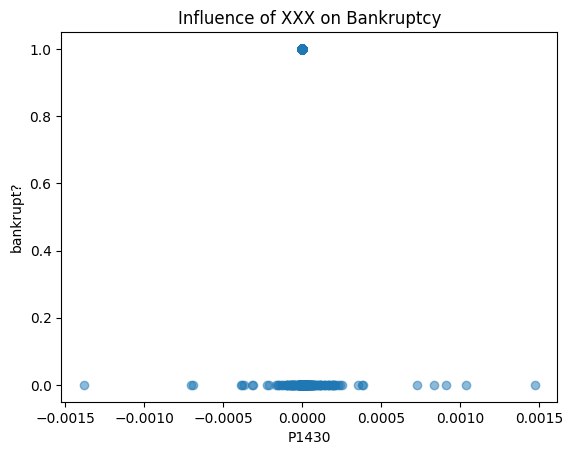

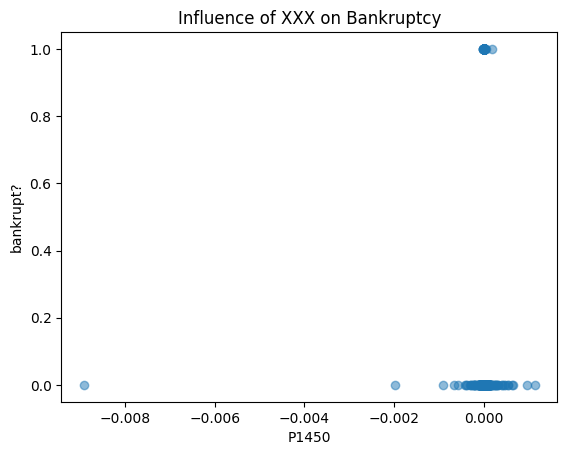

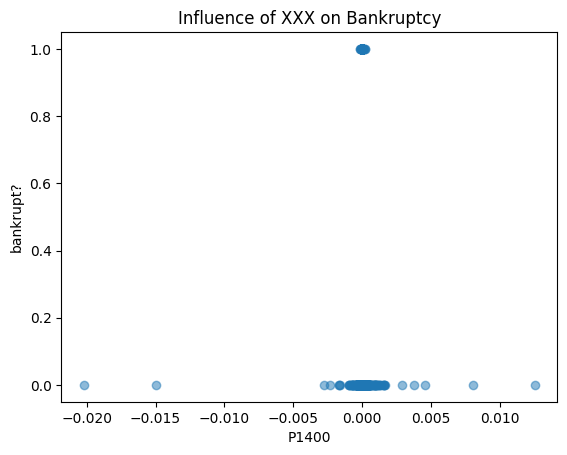

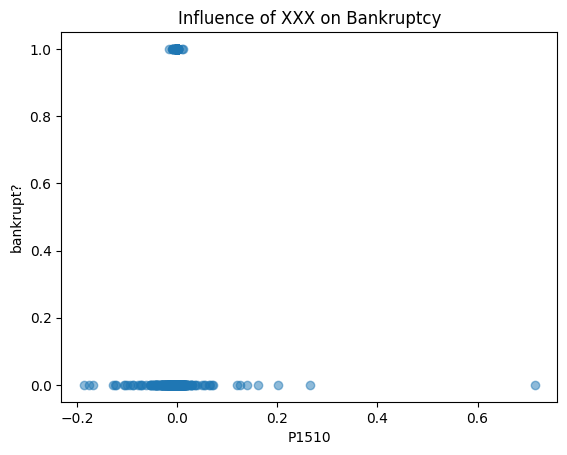

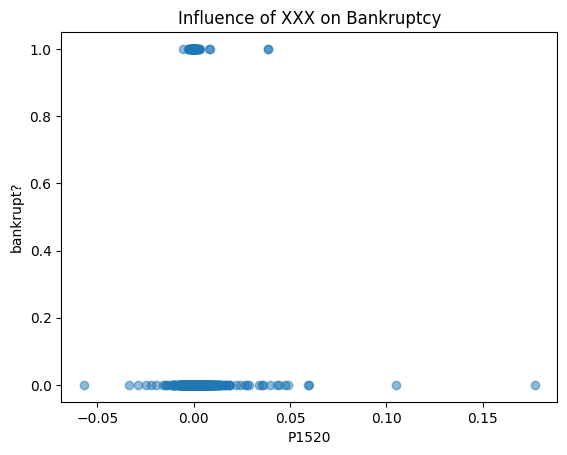

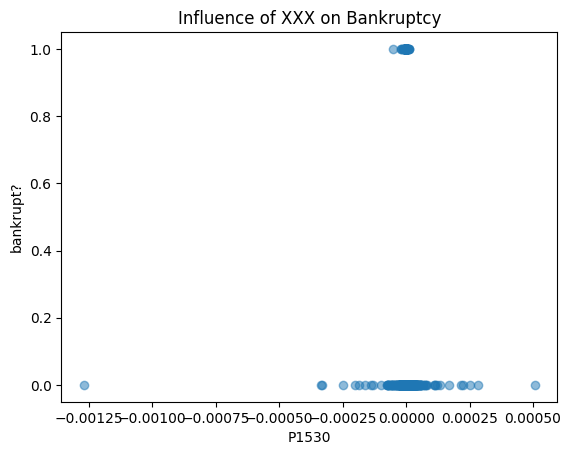

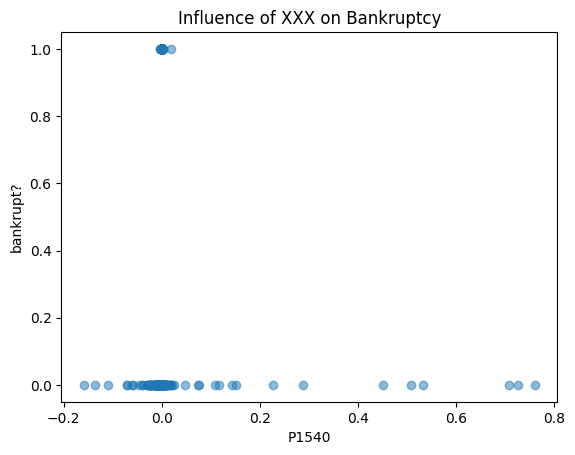

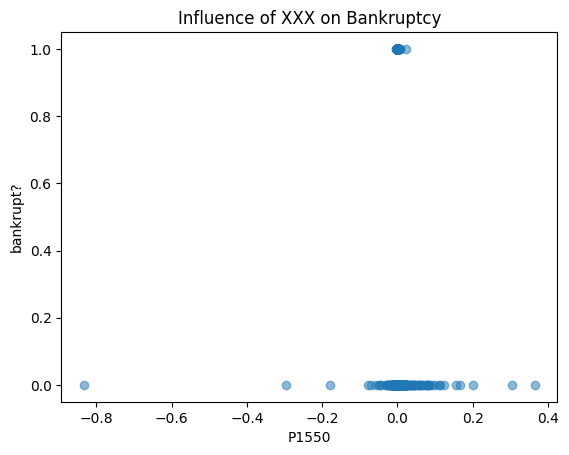

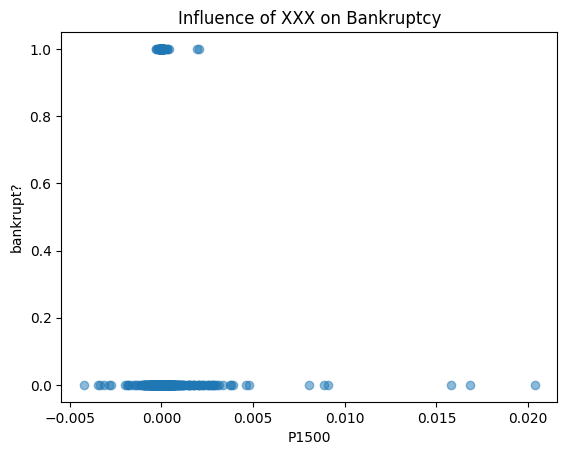

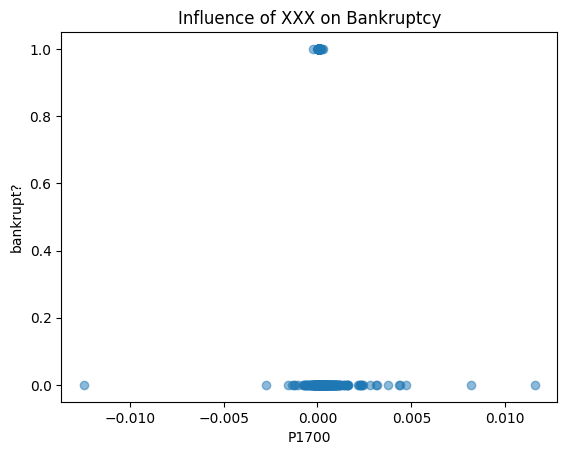

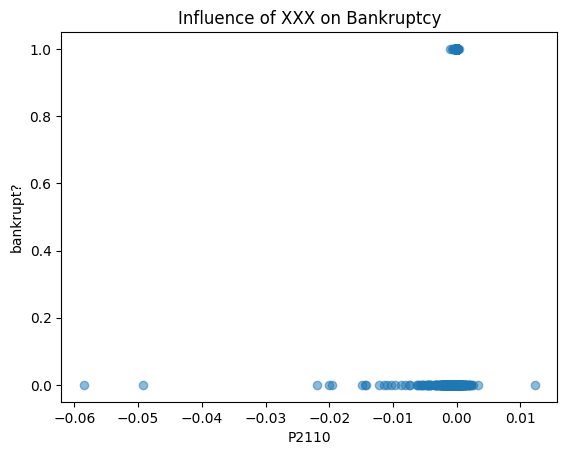

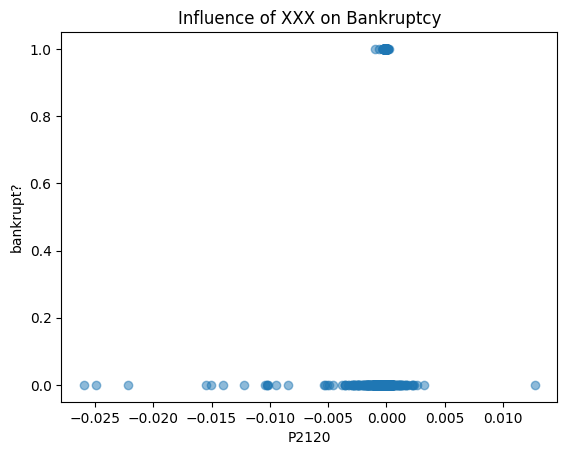

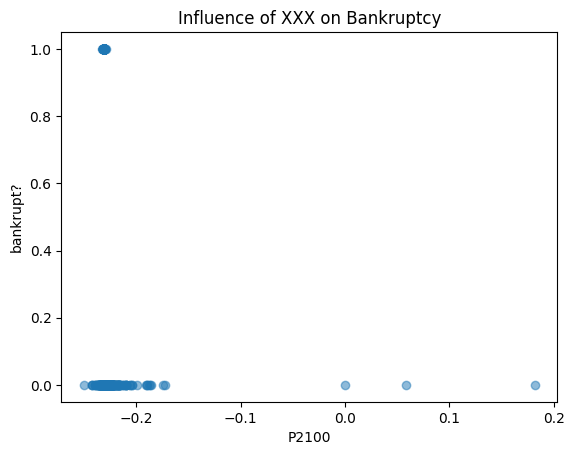

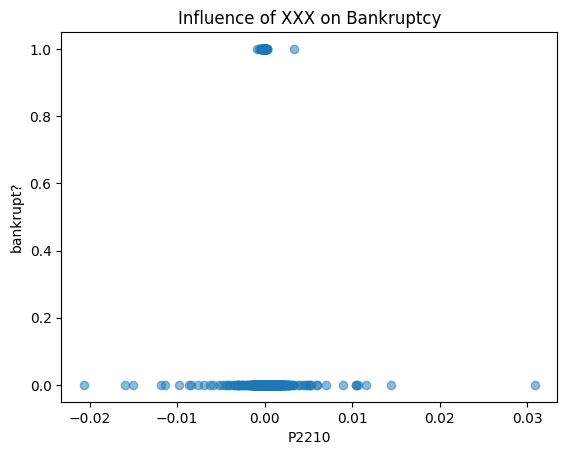

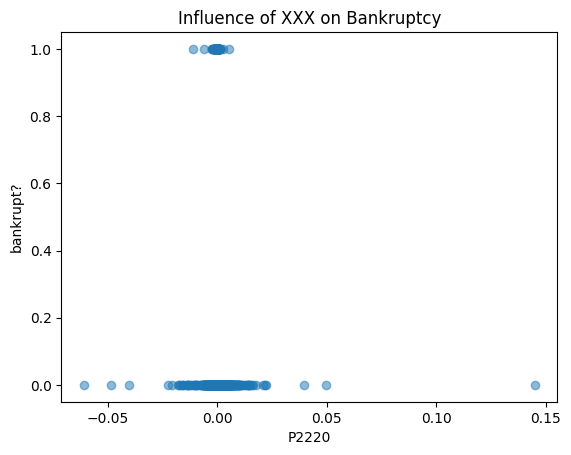

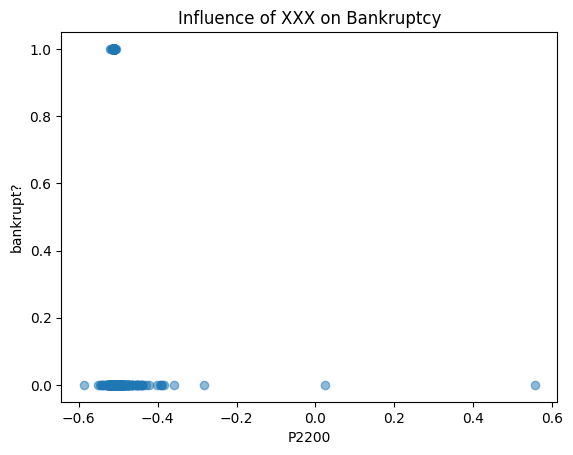

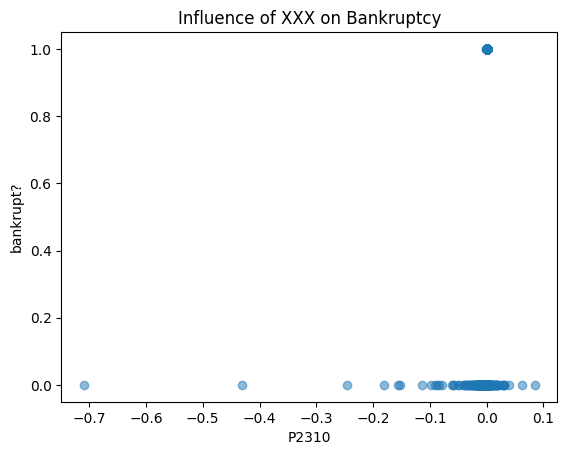

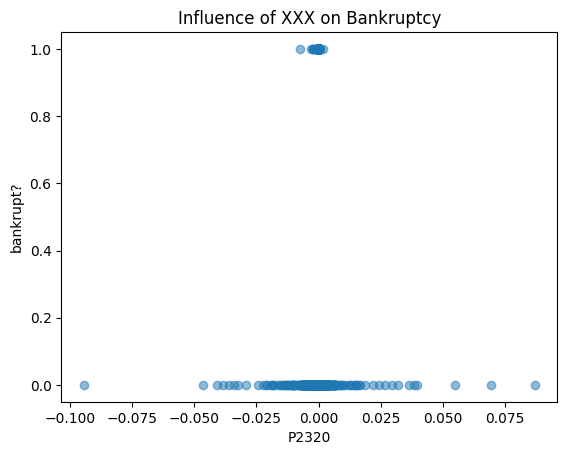

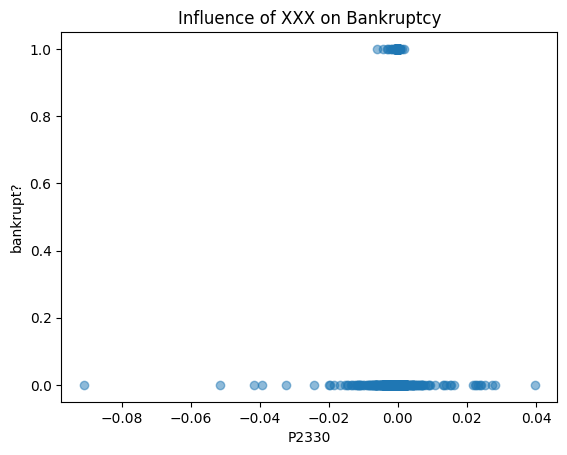

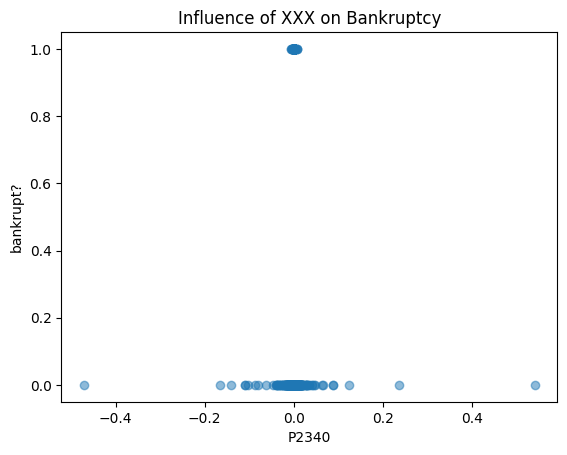

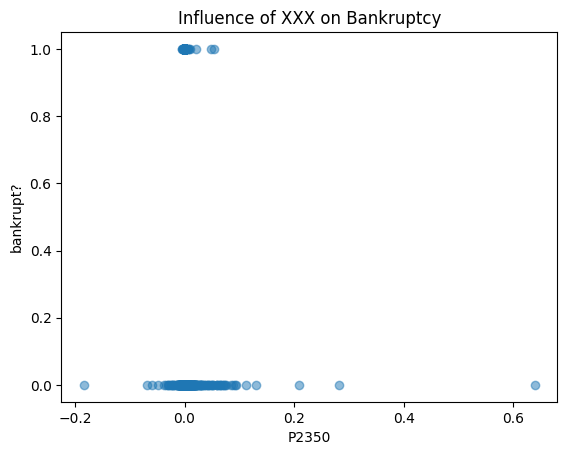

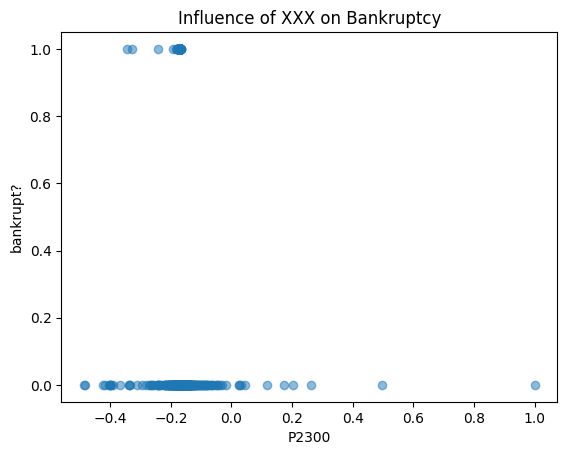

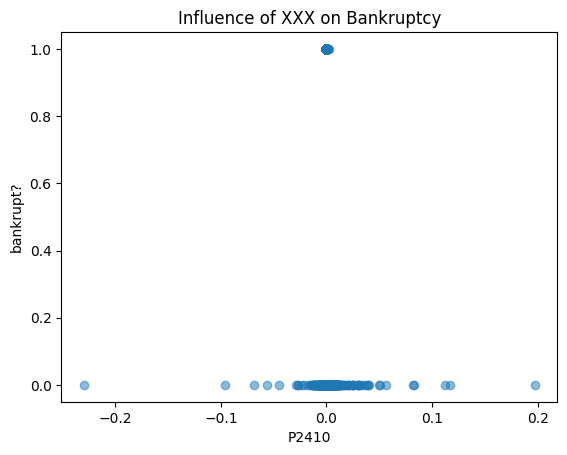

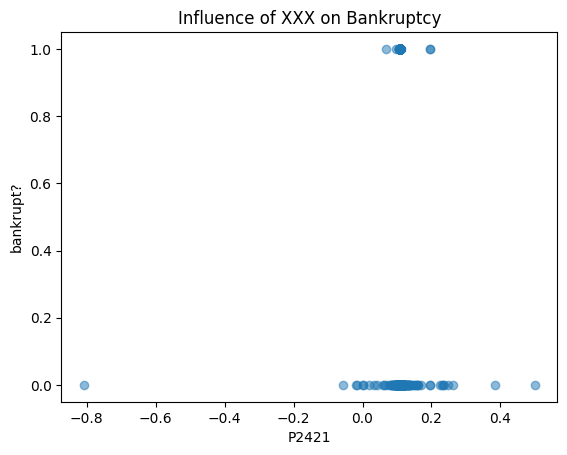

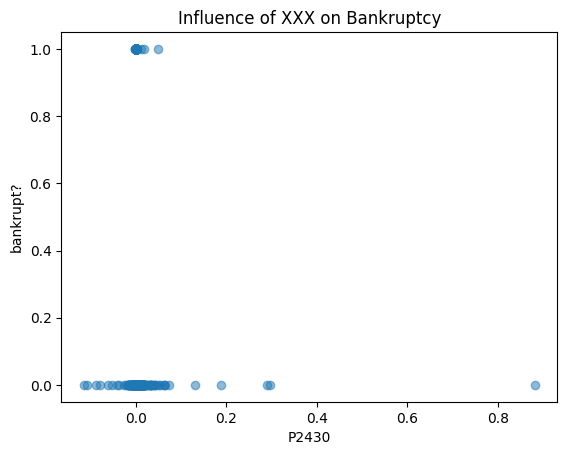

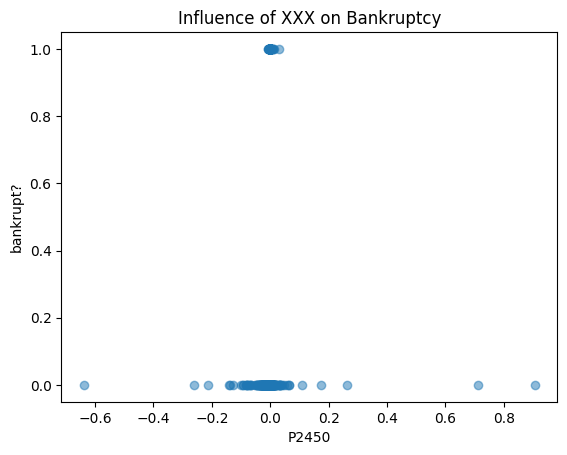

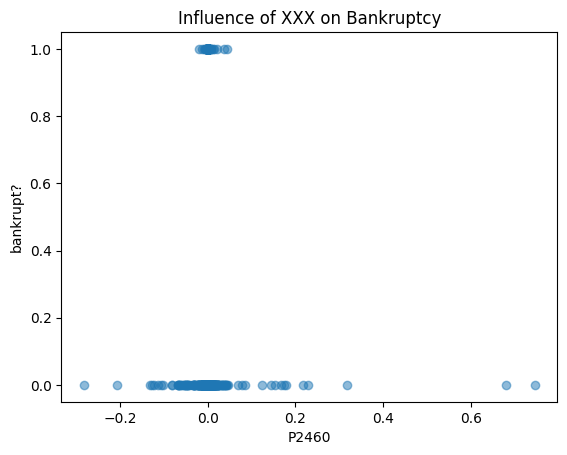

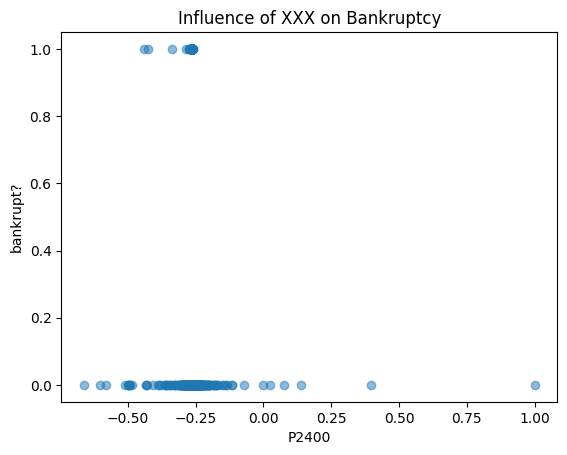

In [87]:
print("Number of null values in train_df is:", train_df.isnull().sum().sum())
train_df.head()

diff_dict = {}
for column in train_df.columns:
    if column.endswith('_B'):
        # Find the corresponding end column
        end_column = column.replace('_B', '_E')
        # Check if the end column exists in the dataframe
        if end_column in train_df.columns:
            # Calculate the difference and create a new column for it
            diff_dict[column.replace('_B', '_diff')] = train_df[end_column] - train_df[column]
        plt.scatter(diff_dict[column.replace('_B', '_diff')], train_df['BANKR'], alpha=0.5)
        plt.title('Influence of XXX on Bankruptcy')
        plt.xlabel(column.replace('_B', ''))
        plt.ylabel('bankrupt?')
        plt.show()


# train_df['current_ratio'] = (train_df['P1200_E'] - train_df['P1200_B']) - (train_df['P1500_E'] - train_df['P1500_B'])
# # train_df.plot(kind='scatter', x='BANKR', y='current_ratio')
# plt.scatter(train_df['current_ratio'], train_df['BANKR'], alpha=0.5)
# plt.title('Influence of Revenue on Bankruptcy')
# plt.xlabel('current_difference')
# plt.ylabel('Went Bankrupt')
# plt.show()


In [59]:
print("Number of null values in test_df is:", test_df.isnull().sum().sum())
test_df.head()

Number of null values in test_df is: 0


,ID_FIRM,P1110_B,P1110_E,P1120_B,P1120_E,P1130_B,P1130_E,P1140_B,P1140_E,P1150_B,...,P2421_B,P2421_E,P2430_B,P2430_E,P2450_B,P2450_E,P2460_B,P2460_E,P2400_B,P2400_E
0,733272,0,0,2996,2341,0,0,0,0,61494,...,-3587,3931,142,1939,4,18,0,0,25109,12736
1,733273,0,0,0,0,0,0,0,0,27350,...,-3353,-1197,397,130,69557,67298,1,484,-272461,-273373
2,733274,0,0,0,0,0,0,0,0,13,...,0,-25,0,0,463,307,0,0,-1872,-1379
3,733275,59318,51231,0,0,0,0,0,0,31791,...,54300,13776,4559,29090,2703,22140,6923,5778,-491120,207104
4,733276,0,0,0,0,0,0,0,0,4219,...,3408,-56,300,158,40,7,1,9,-5304,22689


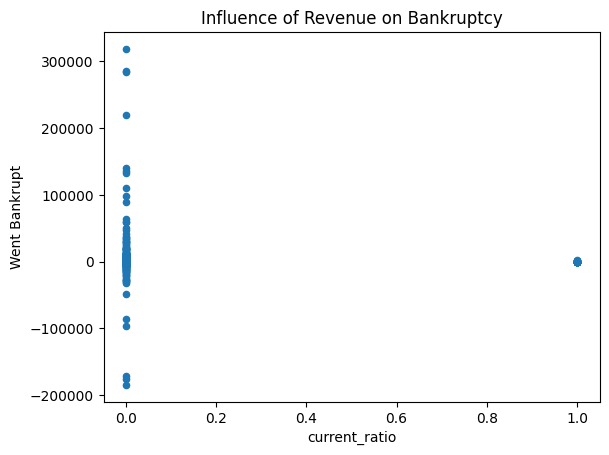

In [60]:
# Store the firm_ids for the output csv later
firm_ids=test_df['ID_FIRM']
# Normalize the data
train_df=(train_df-train_df.min())/(train_df.max()-train_df.min())
train_df=train_df.drop('ID_FIRM', axis=1)
test_df=(test_df-test_df.min())/(test_df.max()-test_df.min())
test_df=test_df.drop('ID_FIRM', axis=1)

train_df.head()
train_df['current_ratio'] = (train_df['P1200_E'] - train_df['P1200_B']) / (train_df['P1500_E'] - train_df['P1500_B'])
train_df.plot(kind='scatter', x='BANKR', y='current_ratio')
plt.title('Influence of Revenue on Bankruptcy')
plt.xlabel('current_ratio')
plt.ylabel('Went Bankrupt')
plt.show()

In [38]:
# Split the training data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('BANKR', axis=1), train_df['BANKR'], test_size=0.2, random_state=42)

# Train the model, see explanation for BRF here: https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb
# model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)


# # Hyperparameter Tuning
# param_grid = {
#     'max_depth': [None, 10, 20, 30]
# }

# grid_search = GridSearchCV(BalancedRandomForestClassifier(n_estimators=100, random_state=42), param_grid)
# grid_search.fit(X_train, y_train)

# Best parameters
# best_params = grid_search.best_params_

# Train the model with best parameters
# model = BalancedRandomForestClassifier(**best_params, random_state=42)
model = BalancedRandomForestClassifier(n_estimators=100,  random_state=42)
model.fit(X_train, y_train)



# Evaluate the model
predictions = model.predict(X_test)
print("Validation Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Validation Accuracy: 0.8191810712215745
Confusion Matrix:
 [[119598  26411]
 [   107    539]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.82      0.90    146009
         1.0       0.02      0.83      0.04       646

    accuracy                           0.82    146655
   macro avg       0.51      0.83      0.47    146655
weighted avg       0.99      0.82      0.90    146655



In [39]:
# Predict on test set
test_predictions = model.predict(test_df)

# Prepare submission file
submission = pd.DataFrame({'ID_FIRM': firm_ids, 'BANKR': test_predictions})
submission['BANKR'] = submission['BANKR'].astype(int)
submission.to_csv('submission.csv', index=False)

submission.head()


,ID_FIRM,BANKR
0,733272,1
1,733273,1
2,733274,0
3,733275,0
4,733276,0
